# DS 3000 - Assignment [TODO: enter assignment number]

**Student Name**: [TODO: Enter your name here]

**Date**: [TODO: Enter the date]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## PART 1: DATA PREPERATION
##  Loading the dataset
In the provided code, the Miami housing dataset is loaded using the Pandas library. The first 10 rows of the dataset are then displayed using the head(10) method, offering a brief glimpse into its contents.

The dataset includes various columns such as property location coordinates (LATITUDE and LONGITUDE), parcel information (PARCELNO), sale details (SALE_PRC), and features related to the property (LND_SQFOOT, TOT_LVG_AREA, SPEC_FEAT_VAL). Additionally, the dataset contains information about distances to different landmarks, such as RAIL_DIST, OCEAN_DIST, WATER_DIST, CNTR_DIST, SUBCNTR_DIST, and HWY_DIST.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the dataset
miami_housing_df = pd.read_csv("miami-housing.csv")

# Display the first 50 rows of the dataframe
miami_housing_df.head(10)


,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
5,25.892060,-80.161354,622280070180,630000.0,9900,1531,2978,2391.4,13017.0,188.9,43135.1,38176.2,15687.2,41,0,2,4
6,25.892473,-80.157217,622280080100,1020000.0,10387,1753,23116,3277.4,11667.8,0.0,43598.7,37973.9,17068.2,63,0,2,5
7,25.893019,-80.157426,622280080400,850000.0,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4
8,25.893046,-80.161556,622280080020,250000.0,9375,1493,11668,2081.8,13043.8,51.5,43481.7,38542.0,15623.3,56,0,3,4
9,25.893050,-80.158048,622280080370,1220000.0,13803,3077,34580,2937.7,11917.7,9.7,43730.1,38235.2,16787.0,63,0,11,5


##  Inspecting the data to:
- Display information about the variables
- Display the data types of each column
- Display the unique values in each column

The output from the provided code provides valuable insights into the composition of the Miami housing dataset. Firstly, the dimensions output reveals that the dataset comprises 13,932 entries (rows) and 17 variables (columns), offering a substantial amount of data for analysis. The info() output further highlights that the dataset is primarily composed of two data types: floats and integers.

The nunique() output sheds light on the variability within each column. Notably, several columns exhibit a diverse range of unique values, particularly variables related to geographical coordinates, distances to landmarks, and property features. On the other hand, certain columns, such as 'avno60plus,' seem to have only two unique values, indicating a potential binary categorical variable.

The dtypes output summarizes the data types of each column, specifying that the majority of the variables are either of float64 or int64 types.


In [3]:
# Check the dimensions of the dataframe
dimensions = miami_housing_df.shape
print("Dimensions of the dataframe:", dimensions)

# Display information about the variables, including data types
data_info = miami_housing_df.info()

# Display the unique values in each column
unique_values = miami_housing_df.nunique()

# Display the data types of each column
data_types = miami_housing_df.dtypes

# Print the results
print("\nInformation about the variables:")
print(data_info)

print("\nUnique values in each column:")
print(unique_values)

print("\nData types of each column:")
print(data_types)


Dimensions of the dataframe: (13932, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-


The code below performs a scaling operation on the 'SALE_PRC' column in the 'miami_housing_df' DataFrame. The scaling is achieved by dividing each value in the 'SALE_PRC' column by 100,000 and storing the results in a new column named 'SALE_PRC_scaled.' Subsequently, the original 'SALE_PRC' column is dropped from the DataFrame using the drop method with inplace=True.

The primary reason for scaling data for this assignment is to bring all the values within a comparable range, typically between 0 and 1 or -1 and 1. Scaling is crucial in situations where variables have different units or orders of magnitude. In the case of the 'SALE_PRC' column, the values represent property sale prices, and on top of that, they  span a wide range.

In [4]:
# Assuming miami_housing_df is your DataFrame and SALE_PRC is the column to be scaled
miami_housing_df['SALE_PRC_scaled'] = miami_housing_df['SALE_PRC'] / 100000

# Drop the original SALE_PRC column if you no longer need it
miami_housing_df.drop('SALE_PRC', axis=1, inplace=True)



##  Summary statistics

The summary statistics in the 'miami_housing_df' DataFrame offer a detailed analysis of the dataset's key characteristics. With a consistent count of 13,932 entries across all variables, indicating no missing data, these statistics provide valuable insights. The mean values, such as LATITUDE at approximately 25.73 and SALE_PRC_scaled around 3.99, offer a measure of central tendency. Standard deviations reveal the extent of variability, with SPEC_FEAT_VAL exhibiting substantial diversity. The range of data is illustrated by minimum and maximum values, for instance, SALE_PRC_scaled ranging from 0.72 to 26.5. Percentiles, including WATER_DIST's 25th percentile at 2675.85, contribute to understanding data distribution. These statistics collectively contribute to a comprehensive understanding of the dataset's nuances.

In [5]:
# Generate summary statistics 
numeric_summary = miami_housing_df.describe()

# Display summary
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)


Summary Statistics for Numeric Columns:
           LATITUDE     LONGITUDE      PARCELNO    LND_SQFOOT  TOT_LVG_AREA  \
count  13932.000000  13932.000000  1.393200e+04  13932.000000  13932.000000   
mean      25.728811    -80.327475  2.356496e+12   8620.879917   2058.044574   
std        0.140633      0.089199  1.199290e+12   6070.088742    813.538535   
min       25.434333    -80.542172  1.020008e+11   1248.000000    854.000000   
25%       25.620056    -80.403278  1.079160e+12   5400.000000   1470.000000   
50%       25.731810    -80.338911  3.040300e+12   7500.000000   1877.500000   
75%       25.852269    -80.258019  3.060170e+12   9126.250000   2471.000000   
max       25.974382    -80.119746  3.660170e+12  57064.000000   6287.000000   

       SPEC_FEAT_VAL     RAIL_DIST    OCEAN_DIST    WATER_DIST      CNTR_DIST  \
count   13932.000000  13932.000000  13932.000000  13932.000000   13932.000000   
mean     9562.493468   8348.548715  31690.993798  11960.285235   68490.327132   
std  

##  Finding out Whether There are Missing Values
The code checks for missing values in the 'miami_housing_df' DataFrame and prints the count of missing values for each column. 

Firstly, the isnull() method is applied to the DataFrame, generating a boolean mask where 'True' represents a missing value, and 'False' indicates a non-missing value. Subsequently, the sum() method is used to count the 'True' values for each column.

The output shows that the count of missing values is zero for every column, confirming that the dataset is complete with no missing entries. This is an important aspect of data quality assurance, ensuring that all variables have information for every observation. In this case, the absence of missing values enhances the dataset's suitability for further exploration.

In [6]:
print("Number of missing values:")
print(miami_housing_df.isnull().sum())

Number of missing values:
LATITUDE             0
LONGITUDE            0
PARCELNO             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
SALE_PRC_scaled      0
dtype: int64


##  Specifying columns with outliers

The code given below prints the number of values in each column before outlier removal using the count() method. This serves as a baseline to understand the dataset's original size.


In [7]:
# Specify columns with outliers to check
columns_to_check = ['SALE_PRC_scaled', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST']

# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = miami_housing_df[column].quantile(0.25)
    Q3 = miami_housing_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = miami_housing_df[(miami_housing_df[column] < lower_bound) | (miami_housing_df[column] > upper_bound)]
    return outliers

# Detect outliers for each specified column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(column)

# Display the outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    display(outliers)


Outliers in SALE_PRC_scaled:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
2,25.891334,-80.153740,622280100470,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,8.000
3,25.891765,-80.152657,622280100530,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,9.880
4,25.891825,-80.154639,622280100200,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,7.550
6,25.892473,-80.157217,622280080100,10387,1753,23116,3277.4,11667.8,0.0,43598.7,37973.9,17068.2,63,0,2,5,10.200
7,25.893019,-80.157426,622280080400,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4,8.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,25.698618,-80.395059,3049360430060,13904,3727,23910,13477.7,41933.4,29246.2,72329.5,27065.9,3013.7,0,0,4,4,8.911
12077,25.699971,-80.385552,3049360150880,17550,3692,43334,11349.6,40153.0,26286.1,69261.8,24046.0,492.0,23,0,12,4,7.450
12078,25.700179,-80.396985,3049360200020,12700,3743,48829,14336.7,42789.7,29539.8,72707.0,27792.6,3862.9,19,0,8,4,7.325
12079,25.700516,-80.384786,3049360150090,21395,3257,39605,11301.7,40154.4,25899.2,68876.9,23786.3,246.7,23,0,11,4,7.400


Outliers in LND_SQFOOT:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
22,25.896591,-80.148070,622280170630,18745,3992,22191,4621.6,8524.0,80.8,45894.1,38871.9,20105.8,59,0,9,5,9.000
31,25.898504,-80.145395,622280210940,15244,3315,26097,5067.3,7668.4,0.0,46848.5,39436.1,21037.4,37,0,8,5,12.000
66,25.966154,-80.122013,1912350050760,15963,2707,185,8298.3,1094.9,0.0,56623.0,56623.0,14121.3,77,0,5,4,26.000
103,25.895545,-80.175770,622290180040,16006,1711,0,2144.3,17677.7,3032.5,43485.8,40861.1,11010.0,70,0,10,2,2.160
158,25.907475,-80.184223,622190061650,17577,1397,15000,6811.2,20455.9,3888.4,47558.8,45928.4,8384.3,46,0,4,4,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,25.608864,-80.445312,3059330170930,17500,2572,30904,5782.6,44912.4,27062.7,103066.6,52108.9,21755.7,19,0,12,2,4.150
13676,25.610466,-80.442649,3059330170680,15875,2566,30636,5471.2,44061.7,26633.5,102018.3,51059.0,20722.5,19,0,3,2,4.200
13792,25.615372,-80.429908,3059270090080,15000,2898,30815,3338.3,39998.3,24396.6,97590.2,46589.1,16167.5,25,0,10,4,3.735
13794,25.616127,-80.429872,3059270090100,15000,2637,28946,3500.1,39993.5,24572.9,97378.6,46386.6,16018.9,21,0,5,4,3.950


Outliers in TOT_LVG_AREA:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
19,25.895404,-80.154410,622280120740,10875,4552,35124,3253.8,10645.2,0.0,44898.4,38841.8,18007.8,8,0,3,5,18.700
22,25.896591,-80.148070,622280170630,18745,3992,22191,4621.6,8524.0,80.8,45894.1,38871.9,20105.8,59,0,9,5,9.000
25,25.897074,-80.147064,622280210930,12500,4428,41032,4815.7,8226.9,0.0,46198.8,39022.9,20455.9,16,0,6,5,15.875
27,25.897585,-80.151392,622280200460,9375,4028,62453,3523.5,9672.6,4.8,45930.7,39415.6,19068.5,2,0,1,5,24.500
36,25.899478,-80.148292,622280210580,13176,4480,31386,4048.2,8595.8,0.0,46908.8,39925.7,20065.3,24,0,5,5,16.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12070,25.697732,-80.391089,3049360260340,13825,4258,46322,12274.4,40805.3,28270.3,71257.8,25736.0,1746.5,12,0,4,4,7.900
12071,25.698052,-80.395038,3049360430040,14546,4553,49350,13344.3,41784.4,29337.9,72402.1,27032.3,2901.1,0,0,10,4,10.181
13086,25.676723,-80.401831,3059020020360,17400,4189,49819,10190.5,38523.3,34054.0,77769.0,29361.4,4270.4,26,0,4,4,7.000
13102,25.680569,-80.412862,3059020021120,15080,4495,1703,13911.6,42334.0,37001.3,80383.9,32793.9,7839.3,31,0,8,4,6.000


Outliers in SPEC_FEAT_VAL:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
2,25.891334,-80.153740,622280100470,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,8.00
7,25.893019,-80.157426,622280080400,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4,8.50
9,25.893050,-80.158048,622280080370,13803,3077,34580,2937.7,11917.7,9.7,43730.1,38235.2,16787.0,63,0,11,5,12.20
17,25.894441,-80.161129,622280080090,9375,2574,37975,1847.6,12871.0,42.0,44007.1,38994.4,15786.3,62,0,10,4,5.90
19,25.895404,-80.154410,622280120740,10875,4552,35124,3253.8,10645.2,0.0,44898.4,38841.8,18007.8,8,0,3,5,18.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13795,25.616279,-80.427959,3059270092010,8266,2527,33664,3072.8,39418.5,24175.5,96905.2,45900.2,15476.1,26,0,3,4,3.47
13809,25.622745,-80.430275,3059270130030,13989,1996,32602,3913.4,40424.2,26359.0,96107.5,45225.9,15426.4,25,0,7,4,3.40
13811,25.624716,-80.428378,3059270131580,8559,2017,39444,3102.6,39918.0,26279.4,95196.4,44330.6,14656.5,26,0,9,4,3.50
13835,25.621488,-80.420679,3059270060310,7502,1875,30159,2398.3,37248.7,23491.4,93846.8,42846.9,12557.6,26,0,3,4,3.10


Outliers in RAIL_DIST:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
2690,25.687080,-80.167580,2452050012280,7656,1729,9633,26827.1,2016.5,623.7,33554.4,33554.4,26600.1,65,0,2,5,18.500
2691,25.688750,-80.168815,2452050010660,7478,2338,31724,26093.2,2047.6,1265.3,32861.0,32861.0,25866.3,56,0,12,5,18.951
2692,25.689929,-80.171187,2452050011060,7500,3557,36285,25323.1,1180.7,645.4,32253.4,32253.4,25097.3,8,0,9,5,25.500
2696,25.692767,-80.160293,2452050470530,6565,4000,32255,26443.2,1185.9,1048.8,32255.6,32255.6,26220.9,17,0,3,3,26.000
2699,25.694298,-80.160976,2442320030330,12000,1901,9980,25841.2,1422.4,1262.4,31639.1,31639.1,25620.1,53,0,12,4,23.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11150,25.948790,-80.335049,3020030180370,3771,1746,877,25726.5,70790.9,2810.2,78102.1,76605.6,3497.5,27,0,1,4,2.719
11154,25.949446,-80.337751,3020030150670,5906,1675,4558,25411.5,71673.1,3032.8,78800.9,77105.1,2693.4,28,0,7,4,3.150
11158,25.953221,-80.343800,3020040010300,4500,1869,912,25621.7,73763.2,1380.8,81119.9,79091.6,368.8,26,0,8,5,3.000
11159,25.953418,-80.343135,3020040010460,4500,1708,1252,25783.1,73546.7,1342.3,81040.8,79094.7,456.0,26,0,9,5,3.050


Outliers in OCEAN_DIST:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled


Outliers in WATER_DIST:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
10883,25.621902,-80.530988,3058280000130,54886,1765,2110,18336.6,73290.2,44716.2,124628.8,75477.6,48167.3,33,0,8,2,1.800
12239,25.713602,-80.460567,3049200240480,6904,2295,0,8079.9,62091.9,44736.3,91058.2,49261.0,24942.4,13,0,5,4,3.425
12243,25.714701,-80.459761,3049200240240,6000,2323,0,8429.3,62105.4,44345.6,90715.6,49090.2,24835.9,14,0,7,4,3.550
12244,25.715209,-80.461088,3049200380080,6000,2068,0,8028.5,62565.3,44664.9,91077.9,49539.6,25298.2,0,0,1,4,4.192
12245,25.715420,-80.461856,3049200320360,6000,2049,30268,7802.6,62816.5,44869.0,91304.1,49802.5,25562.1,10,0,3,4,3.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12807,25.680480,-80.448791,3059040630370,5698,2845,1837,10072.2,52638.6,44080.8,91222.1,44630.7,19702.5,20,0,8,4,3.600
12817,25.681605,-80.447406,3059040630630,4860,2524,531,10539.3,52407.1,44064.2,90644.5,44150.5,19231.8,19,0,11,4,3.700
12818,25.681710,-80.448780,3059040630460,4860,2517,656,10089.2,52829.7,44399.5,91049.8,44601.5,19683.9,20,0,8,4,3.580
12819,25.682048,-80.446573,3059040660220,3893,2714,3226,10846.6,52250.6,44003.0,90348.5,43895.3,18979.6,18,0,7,4,3.575


Outliers in CNTR_DIST:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
10686,25.434333,-80.498280,3078260080050,20257,3150,7896,10909.9,53602.9,20102.9,159976.5,110553.8,9953.5,27,0,4,2,2.15
10692,25.438376,-80.499806,3078260060500,18771,2105,3160,9675.5,53755.5,19597.8,159161.7,109618.5,9514.4,26,0,3,2,1.98
10850,25.448097,-80.513852,3078220000150,54450,1372,1109,9670.7,57678.6,14958.5,159393.8,109347.2,12843.5,20,0,12,2,2.85


Outliers in SUBCNTR_DI:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
10616,25.464636,-80.497681,1078140061660,8246,1239,3169,2703.5,51861.4,20901.7,151454.1,101436.4,8624.8,16,0,8,2,1.70
10617,25.464694,-80.500620,1078140062680,8188,1492,2055,3660.0,52819.2,19981.4,152101.8,102021.0,9514.6,23,0,12,2,1.78
10618,25.464738,-80.499852,1078140062310,7500,1725,1399,3398.0,52556.9,20221.6,151920.3,101855.6,9289.4,19,0,10,2,1.70
10619,25.465497,-80.499207,1078140061490,8000,1212,10229,3191.6,52342.4,20503.9,151572.0,101506.3,9224.3,23,0,8,2,1.55
10620,25.466371,-80.496373,1078140110560,4034,1606,1019,2257.3,51398.4,21488.6,150730.0,100710.0,8590.0,11,0,7,2,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,25.469215,-80.523314,3078150060270,18132,2910,1601,10327.0,60224.3,12818.6,155979.8,105439.8,17027.3,10,0,5,2,2.90
10862,25.470103,-80.516874,3078150000163,35806,1628,1196,8174.6,58098.3,14948.8,154204.4,103741.8,15145.6,15,0,10,2,2.50
10863,25.471655,-80.522362,3078150080500,21935,2126,1960,9943.9,59892.1,13126.6,155103.0,104542.1,17057.0,5,0,4,2,2.75
10864,25.472372,-80.526860,3078160000410,57064,2000,1253,11313.3,61264.0,11530.7,155880.2,105254.9,18417.8,13,0,4,2,1.76


Outliers in HWY_DIST:


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_scaled
2487,25.874978,-80.123803,1422350051040,5600,1911,38148,15738.4,1215.8,911.2,42258.9,30702.0,22886.9,31,0,7,4,7.500
2488,25.875264,-80.126851,1422350052610,5600,1654,34255,14909.1,2192.8,935.2,41820.2,30752.9,22839.0,66,0,4,2,6.800
2489,25.875451,-80.123488,1422350051100,8400,2274,4927,15701.9,1101.8,835.4,42450.4,30869.7,23063.3,75,0,9,4,7.730
2490,25.875500,-80.124669,1422350051600,5600,1902,0,15398.1,1472.9,1090.9,42267.8,30872.9,23026.7,54,0,7,5,7.145
2491,25.875614,-80.125183,1422350051880,5600,1543,2092,15243.5,1630.4,1140.4,42215.3,30905.3,23042.3,54,0,5,4,6.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13482,25.639397,-80.455726,3059200111030,5407,2982,5565,430.6,49825.8,36599.8,99911.2,50113.7,23184.4,0,0,4,4,4.801
13483,25.639431,-80.455102,3059200111070,5407,2982,1375,436.4,49628.7,36458.9,99727.0,49917.1,22978.4,0,0,5,4,4.815
13484,25.639439,-80.454946,3059200111080,5407,2648,1375,438.0,49579.5,36423.8,99680.9,49868.0,22927.0,0,0,11,4,4.667
13485,25.639448,-80.454790,3059200111090,5407,3079,3300,439.8,49530.2,36388.7,99634.9,49818.8,22875.5,0,0,8,4,4.990


##  Removing the Outliers

The code defines a function named remove_outliers that takes a DataFrame and an optional parameter 'k'. This function utilizes the Interquartile Range method to identify and remove outliers from numerical columns.

After that, the numerical columns relevant for outlier removal are specified in the 'numerical_columns' list.
The remove_outliers function is then applied to these numerical columns, creating a new DataFrame named 'df_no_outliers.'

The code prints the number of values in each column after removing outliers, providing insights into the impact of the outlier removal process.

In [8]:
# Display the number of values (before removing outliers)
print("Number of Values in Each Column Before Removing Outliers:")
print(miami_housing_df.count())

# Define the numerical columns 
numerical_columns = ['LATITUDE', 'LONGITUDE', 'SALE_PRC_scaled', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold', 'structure_quality']

# Define a function to remove outliers using IQR
def remove_outliers(df, k=1.5):
    # Calculate IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify outliers and remove them
    outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
    df_no_outliers = df[~outliers]

    return df_no_outliers

# Display the number of values in each column after removing outliers
df_no_outliers = remove_outliers(miami_housing_df[numerical_columns])
print("\nNumber of Values in Each Column After Removing Outliers:")
print(df_no_outliers.count())


Number of Values in Each Column Before Removing Outliers:
LATITUDE             13932
LONGITUDE            13932
PARCELNO             13932
LND_SQFOOT           13932
TOT_LVG_AREA         13932
SPEC_FEAT_VAL        13932
RAIL_DIST            13932
OCEAN_DIST           13932
WATER_DIST           13932
CNTR_DIST            13932
SUBCNTR_DI           13932
HWY_DIST             13932
age                  13932
avno60plus           13932
month_sold           13932
structure_quality    13932
SALE_PRC_scaled      13932
dtype: int64

Number of Values in Each Column After Removing Outliers:
LATITUDE             10137
LONGITUDE            10137
SALE_PRC_scaled      10137
LND_SQFOOT           10137
TOT_LVG_AREA         10137
SPEC_FEAT_VAL        10137
RAIL_DIST            10137
OCEAN_DIST           10137
WATER_DIST           10137
CNTR_DIST            10137
SUBCNTR_DI           10137
HWY_DIST             10137
age                  10137
avno60plus           10137
month_sold           10137
structu

In [9]:
z_scores = stats.zscore(miami_housing_df['SALE_PRC_scaled'])

# Set a threshold for the maximum allowed Z-score
max_z_score = 2  # Adjust this threshold based on your preference

# Filter out rows where the Z-score is greater than the threshold
miami_housing_df = miami_housing_df[(np.abs(z_scores) <= max_z_score)]

# Display the first 10 rows of the filtered dataframe
print("\nFiltered Miami Housing DataFrame:")
print(miami_housing_df.head(10))


Filtered Miami Housing DataFrame:
     LATITUDE  LONGITUDE      PARCELNO  LND_SQFOOT  TOT_LVG_AREA  \
0   25.891031 -80.160561  622280070620        9375          1753   
1   25.891324 -80.153968  622280100460        9375          1715   
2   25.891334 -80.153740  622280100470        9375          2276   
3   25.891765 -80.152657  622280100530       12450          2058   
4   25.891825 -80.154639  622280100200       12800          1684   
5   25.892060 -80.161354  622280070180        9900          1531   
6   25.892473 -80.157217  622280080100       10387          1753   
7   25.893019 -80.157426  622280080400       10272          1663   
8   25.893046 -80.161556  622280080020        9375          1493   
11  25.893461 -80.168370  622290410300        8438          1794   

    SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0               0     2815.9     12811.4       347.6    42815.3     37742.2   
1               0     4359.1     10648.4       337.8    43

##  Types of Data

The following checks for the presence of columns 'month_sold' and 'avno60plus' in the DataFrame and then determining the type of variable it represents.

For both columns, we complete the following:
If the column exists, it retrieves the unique values from this column and assigns the variable type as 'Ordinal' for 'month_sold' and 'Nominal' for 'avno60plus'. Ordinal data represents categories with a natural order or ranking. Nominal data represents categories without any intrinsic ordering.
Then, it prints out the column name along with its variable type.

In [10]:
# Check for 'month_sold'
month_sold_column = 'month_sold'
if month_sold_column in miami_housing_df.columns:
    unique_values = miami_housing_df[month_sold_column].unique()
    variable_type = 'Ordinal'
    print(f"{month_sold_column}: {variable_type}")

# Check for 'avno60plus'
avno60plus_column = 'avno60plus'
if avno60plus_column in miami_housing_df.columns:
    unique_values = miami_housing_df[avno60plus_column].unique()
    variable_type = 'Nominal'
    print(f"{avno60plus_column}: {variable_type}")


month_sold: Ordinal
avno60plus: Nominal


##  Geographic Analysis

Below shows a scatter plot titled "Geographical Distribution of Miami Properties." The plot is a visual representation of data points on a two-dimensional graph, where each point represents a property's location in terms of its latitude and longitude.

The x-axis is labeled "Longitude" and ranges approximately from -80.5 to -80.2. The y-axis is labeled "Latitude" and ranges from about 25.5 to 26.0. The data points are clustered in patterns that suggest the distribution of properties across different areas in Miami, with denser clusters likely indicating higher concentrations of properties.

Below also shows a heatmap titled "Geographical Distribution of Miami Properties." A heatmap is a data visualization technique that shows the density of data points on a map with colors.

The heatmap uses a color gradient to represent the concentration of properties in Miami based on their geographical coordinates:

- The x-axis represents the longitude, ranging from approximately -80.5 to -80.1.
- The y-axis represents the latitude, ranging from about 25.4 to 26.0.
- The intensity of the color indicates the density of properties, with cooler colors (like dark blue) indicating lower densities and warmer colors (like yellow and green) representing higher densities.
- Areas with the highest concentration of properties are highlighted with the warmest colors, suggesting these are the most densely populated or developed areas within the geographic scope of the data. Conversely, areas with cooler colors represent less density.

The distribution pattern suggests that there are several hotspots of high property density, reflecting urban centers or popular residential areas in Miami. The shape of the concentrations can provide insights into the geographic layout of the property market in the region.

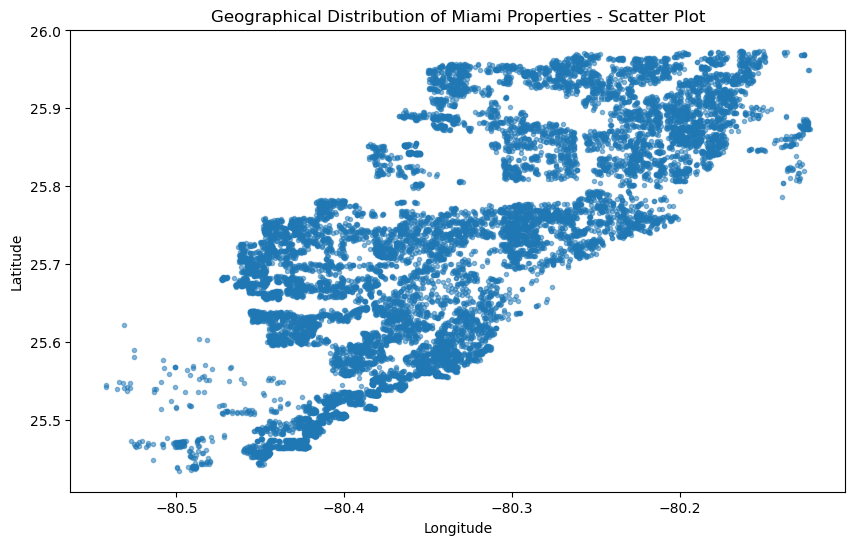

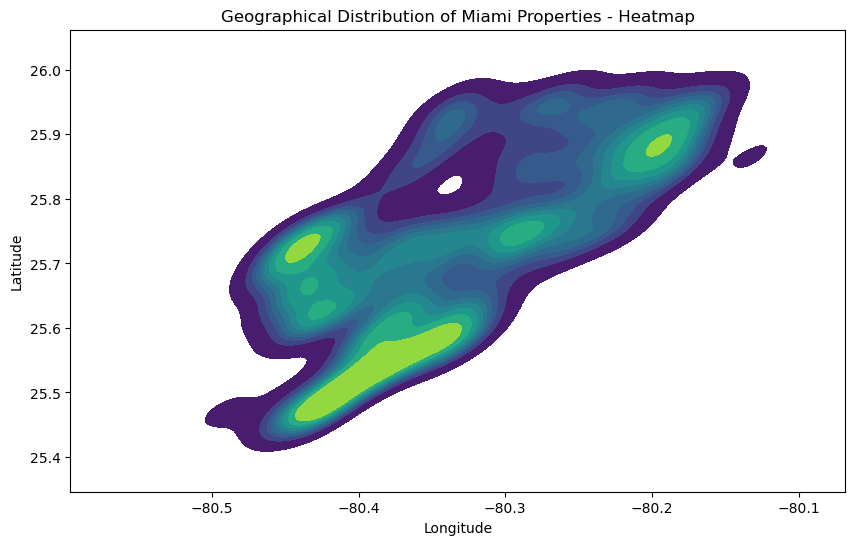

In [11]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(miami_housing_df['LONGITUDE'], miami_housing_df['LATITUDE'], alpha=0.5, marker='.')
plt.title('Geographical Distribution of Miami Properties - Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(x=miami_housing_df['LONGITUDE'], y=miami_housing_df['LATITUDE'], cmap='viridis', fill=True)
plt.title('Geographical Distribution of Miami Properties - Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Below shows a histogram titled "Land Square Footage Distribution." This graph is used to show the distribution of land sizes for a set of properties.

Here's a breakdown of the histogram features:

- The x-axis represents the size of the land in square footage, ranging from 0 to approximately 50,000 square feet.
- The y-axis represents the count of properties falling within each bin of land size. The count ranges from 0 to over 4,000.
- The bars (bins) represent the number of properties within specific ranges of land size. The height of each bar corresponds to the count of properties.
- The distribution is right-skewed, meaning most properties have a smaller land square footage, with fewer properties having larger land sizes.
- The tallest bar is near the beginning of the x-axis, suggesting that the most common land size for properties in this dataset is relatively small.
- The bars decrease in height as the land size increases, indicating that larger land sizes are less common.

This histogram helps to understand the commonality of various land sizes within the dataset, which is related to housing or real estate properties. The skewness of the data suggests that smaller properties are more common in the area being studied.

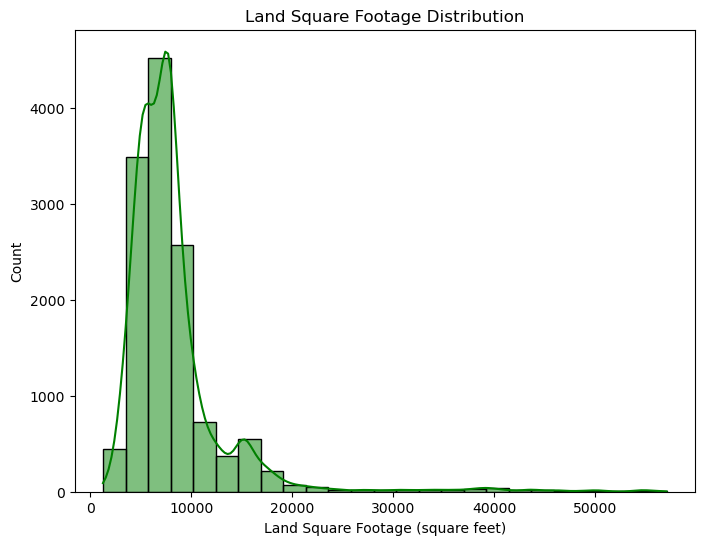


Additional info about the 'LND_SQFOOT' column is as follows:
Mean Land Square Footage: 8273.89
Mode Land Square Footage: 7500 (Count: 1000)
Skewness of Land Square Footage: 4.16
The column has a right-skew.


In [12]:
# Univariate Analysis for LND_SQFOOT
plt.figure(figsize=(8, 6))
sns.histplot(miami_housing_df['LND_SQFOOT'], bins=25, kde=True, color='green')
plt.title('Land Square Footage Distribution')
plt.xlabel('Land Square Footage (square feet)')
plt.ylabel('Count')
plt.show()

lnd_sqfoot_mean = miami_housing_df['LND_SQFOOT'].mean().round(2)
lnd_sqfoot_mode = miami_housing_df['LND_SQFOOT'].mode().values[0].round(2)
lnd_sqfoot_mode_count = miami_housing_df['LND_SQFOOT'].value_counts().max()
lnd_sqfoot_skewness = miami_housing_df['LND_SQFOOT'].skew().round(2)

print("\nAdditional info about the 'LND_SQFOOT' column is as follows:")
print(f"Mean Land Square Footage: {lnd_sqfoot_mean}")
print(f"Mode Land Square Footage: {lnd_sqfoot_mode} (Count: {lnd_sqfoot_mode_count})")
print(f"Skewness of Land Square Footage: {lnd_sqfoot_skewness}")

# Finding the skew pattern
if lnd_sqfoot_skewness > 0:
    print("The column has a right-skew.")
elif lnd_sqfoot_skewness < 0:
    print("The column has a left-skew.")
else:
    print("The column is symmetric.")


Below shows a histogram with the title "Total Living Area Distribution." The histogram is used to represent the frequency distribution of the total living area of properties within a dataset.

Here are the key elements of the histogram:

- The x-axis is labeled "Total Living Area," and it appears to measure the size in square feet, ranging from 0 up to 6000 square feet.
- The y-axis is labeled "Count," which represents the number of properties that fall into each bin of the total living area. The count goes from 0 to over 1750.
- The bars (or bins) on the histogram represent the count of properties within specific ranges of total living area. The height of each bar is proportional to the count of properties in that range.
- The distribution is skewed to the right, meaning there are more properties with a smaller living area and fewer properties with a larger living area.
- The peak of the histogram is around the 1000 to 2000 square feet range, indicating that this is the most common range for the total living area of properties in the dataset.

This histogram is useful for understanding the common sizes of living areas in the property market of the dataset, with the majority of properties having a total living area on the smaller side of the spectrum.

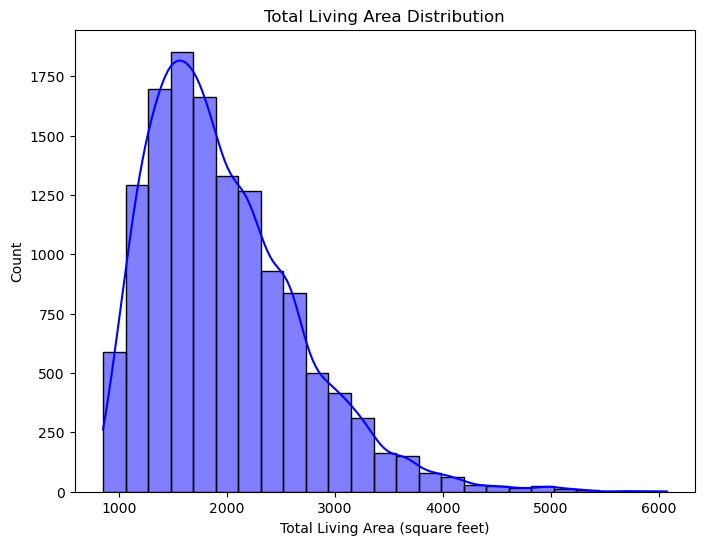


Additional info about the Total Living Area column is as follows:
Mean Total Living Area: 1973.67
Mode Total Living Area: 3079 (Count: 29)
Skewness of Total Living Area: 1.09
Total Living Area column has a right-skew.


In [13]:
# Univariate Analysis for Total Living Area
plt.figure(figsize=(8, 6))
sns.histplot(miami_housing_df['TOT_LVG_AREA'], bins=25, kde=True, color='blue')
plt.title('Total Living Area Distribution')
plt.xlabel('Total Living Area (square feet)')
plt.ylabel('Count')
plt.show()

total_living_area_mean = miami_housing_df['TOT_LVG_AREA'].mean().round(2)
total_living_area_mode = miami_housing_df['TOT_LVG_AREA'].mode().values[0].round(2)
total_living_area_mode_count = miami_housing_df['TOT_LVG_AREA'].value_counts().max()  
total_living_area_skewness = miami_housing_df['TOT_LVG_AREA'].skew().round(2)

print("\nAdditional info about the Total Living Area column is as follows:")
print(f"Mean Total Living Area: {total_living_area_mean}")
print(f"Mode Total Living Area: {total_living_area_mode} (Count: {total_living_area_mode_count})")
print(f"Skewness of Total Living Area: {total_living_area_skewness}")

# Finding the skew pattern
if total_living_area_skewness > 0:
    print("Total Living Area column has a right-skew.")
elif total_living_area_skewness < 0:
    print("Total Living Area column has a left-skew.")
else:
    print("Total Living Area column is symmetric.")


The scatter plot visualizes the relationship between the distance of a structure from the Miami central business district (in feet) on the x-axis, labeled as "CNTR_DIST," and the age of the structure (in years) on the y-axis. 

Based on the plot, the following observations can be made:

- Structures are spread across a wide range of distances from the central business district, from very close to over 160,000 feet away.
- The ages of the structures also vary widely, ranging from new to possibly 100 years old.
- A large concentration of data points with a smaller "CNTR_DIST" suggests that many structures are located closer to the central business district.
- The spread of ages seems relatively uniform across various distances, indicating that there are both old and new structures at different proximities to the center.
- There does not appear to be a clear correlation between the age of a structure and its distance from the Miami central business district; that is, structures' ages don't increase or decrease consistently with distance from the center. However, it looks somewhat negative correlation.

This scatter plot could be useful for urban studies or planning, real estate market analysis, or historical research into the development patterns of the city of Miami.

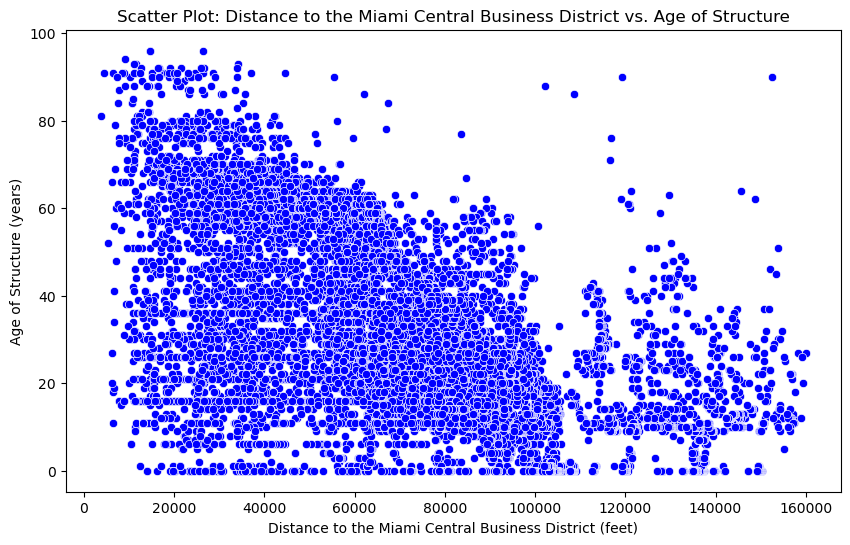

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Correlation Coefficient between CNTR_DIST and Age: -0.58
There is a negative linear relationship.


In [14]:
# Bivariate Analysis: Numeric-Numeric Relationships
# Scatter Plot for CNTR_DIST vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CNTR_DIST', y='age', data=miami_housing_df, color='blue')
plt.title('Scatter Plot: Distance to the Miami Central Business District vs. Age of Structure')
plt.xlabel('Distance to the Miami Central Business District (feet)')
plt.ylabel('Age of Structure (years)')
plt.show()

# Correlation Coefficient 
correlation_coefficient = miami_housing_df['CNTR_DIST'].corr(miami_housing_df['age'])
print(f"\nCorrelation Coefficient between CNTR_DIST and Age: {correlation_coefficient:.2f}")

# Interpretation of correlation strength and direction
if correlation_coefficient > 0:
    print("There is a positive linear relationship.")
elif correlation_coefficient < 0:
    print("There is a negative linear relationship.")
else:
    print("There is no linear relationship.")

The image displays a scatter plot with the title "Numeric-Numeric Relationship: SALE_PRC_scaled vs TOT_LVG_AREA". This graph is used to depict the relationship between two variables: the scaled sale price of properties and their total living area (in square feet).

Here are the main features of the scatter plot:

- The x-axis is labeled "Sale Price (hundreds of thousands of dollars)", with values ranging from just under 2 to 10.
- The y-axis is labeled "Total Living Area (square feet)" with values ranging from approximately 1000 to just over 6000 square feet.
- The plot is scattered with data points in blue, which represent individual properties.
- There appears to be a concentration of data points towards the lower end of both axes, suggesting that a significant number of properties have lower sale prices and smaller living areas.
- As the sale price increases, there is more variability in the size of the living area, indicated by the spread of points. This could suggest that higher-priced properties in the dataset vary more significantly in size.
- There does not appear to be a clear linear relationship between the sale price and the total living area, as the points do not form a distinct line or curve. However, there is a general trend that as the sale price increases, the range of living area sizes also increases.

This scatter plot could be useful for real estate market analysis, providing insights into property value in relation to size within the dataset. It may indicate how living area size affects property value or vice versa.

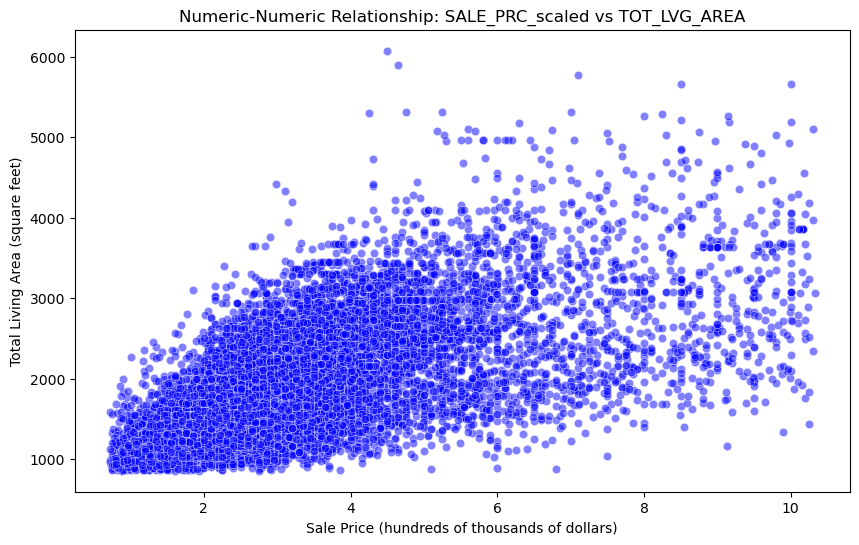


Correlation Coefficient between SALE_PRC_scaled and TOT_LVG_AREA: 0.62
There is a positive linear relationship.


In [15]:
# Bivariate Analysis for Numeric-Numeric Relationships: SALE_PRC vs TOT_LVG_AREA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SALE_PRC_scaled', y='TOT_LVG_AREA', data=miami_housing_df, color='blue', alpha=0.5)
plt.title('Numeric-Numeric Relationship: SALE_PRC_scaled vs TOT_LVG_AREA')
plt.xlabel('Sale Price (hundreds of thousands of dollars)')
plt.ylabel('Total Living Area (square feet)')
plt.show()

# Correlation Coefficient
correlation_coefficient = miami_housing_df[['SALE_PRC_scaled', 'TOT_LVG_AREA']].corr().iloc[0, 1].round(2)

print(f"\nCorrelation Coefficient between SALE_PRC_scaled and TOT_LVG_AREA: {correlation_coefficient}")

# Interpretation of Correlation
if correlation_coefficient > 0:
    print("There is a positive linear relationship.")
elif correlation_coefficient < 0:
    print("There is a negative linear relationship.")
else:
    print("There is no linear relationship.")


The image shows a scatter plot titled "Numeric-Numeric Relationship: SALE_PRC_scaled vs month_sold." This type of plot typically illustrates the relationship between two quantitative variables.

Here are the details:

- The x-axis is labeled "Sale Price (hundreds of thousands of dollars)". The x-axis ranges from about 2 to 10, representing sale prices from 200,000 to 1,000,000 dollars.
- The y-axis is labeled "Month Sold", which is enumerated from 1 to 12, corresponding to the months of the year from January to December.
- The data points are plotted as green circles and are distributed across the plot, forming horizontal lines at each integer value on the y-axis, which corresponds to each month.
- There's a consistent spread of sale prices across all months, with no immediately apparent trend or pattern indicating seasonality affecting sale prices.

This graph could be used to analyze whether there's a relationship between the time of year a property is sold and its sale price. From the visualization, it seems that properties are sold at a range of prices throughout the year, without a significant concentration or pattern that would suggest a strong relationship between the month sold and the sale price.

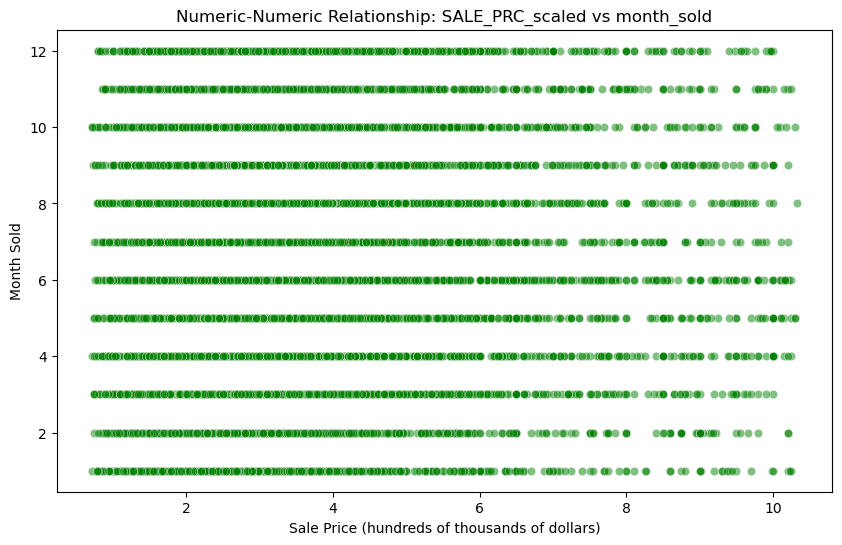


Correlation Coefficient between SALE_PRC_scaled and month_sold: 0.03
There is no linear relationship.


In [16]:
# Bivariate Analysis for Numeric-Numeric Relationships: SALE_PRC vs month_sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SALE_PRC_scaled', y='month_sold', data=miami_housing_df, color='green', alpha=0.5)
plt.title('Numeric-Numeric Relationship: SALE_PRC_scaled vs month_sold')
plt.xlabel('Sale Price (hundreds of thousands of dollars)')
plt.ylabel('Month Sold')
plt.show()

# Correlation Coefficient
correlation_coefficient = miami_housing_df[['SALE_PRC_scaled', 'month_sold']].corr().iloc[0, 1].round(2)

print(f"\nCorrelation Coefficient between SALE_PRC_scaled and month_sold: {correlation_coefficient}")

# Interpretation of Correlation
if correlation_coefficient > 0.05:
    print("There is a positive linear relationship.")
elif correlation_coefficient < -0.05:
    print("There is a negative linear relationship.")
else:
    print("There is no linear relationship.")


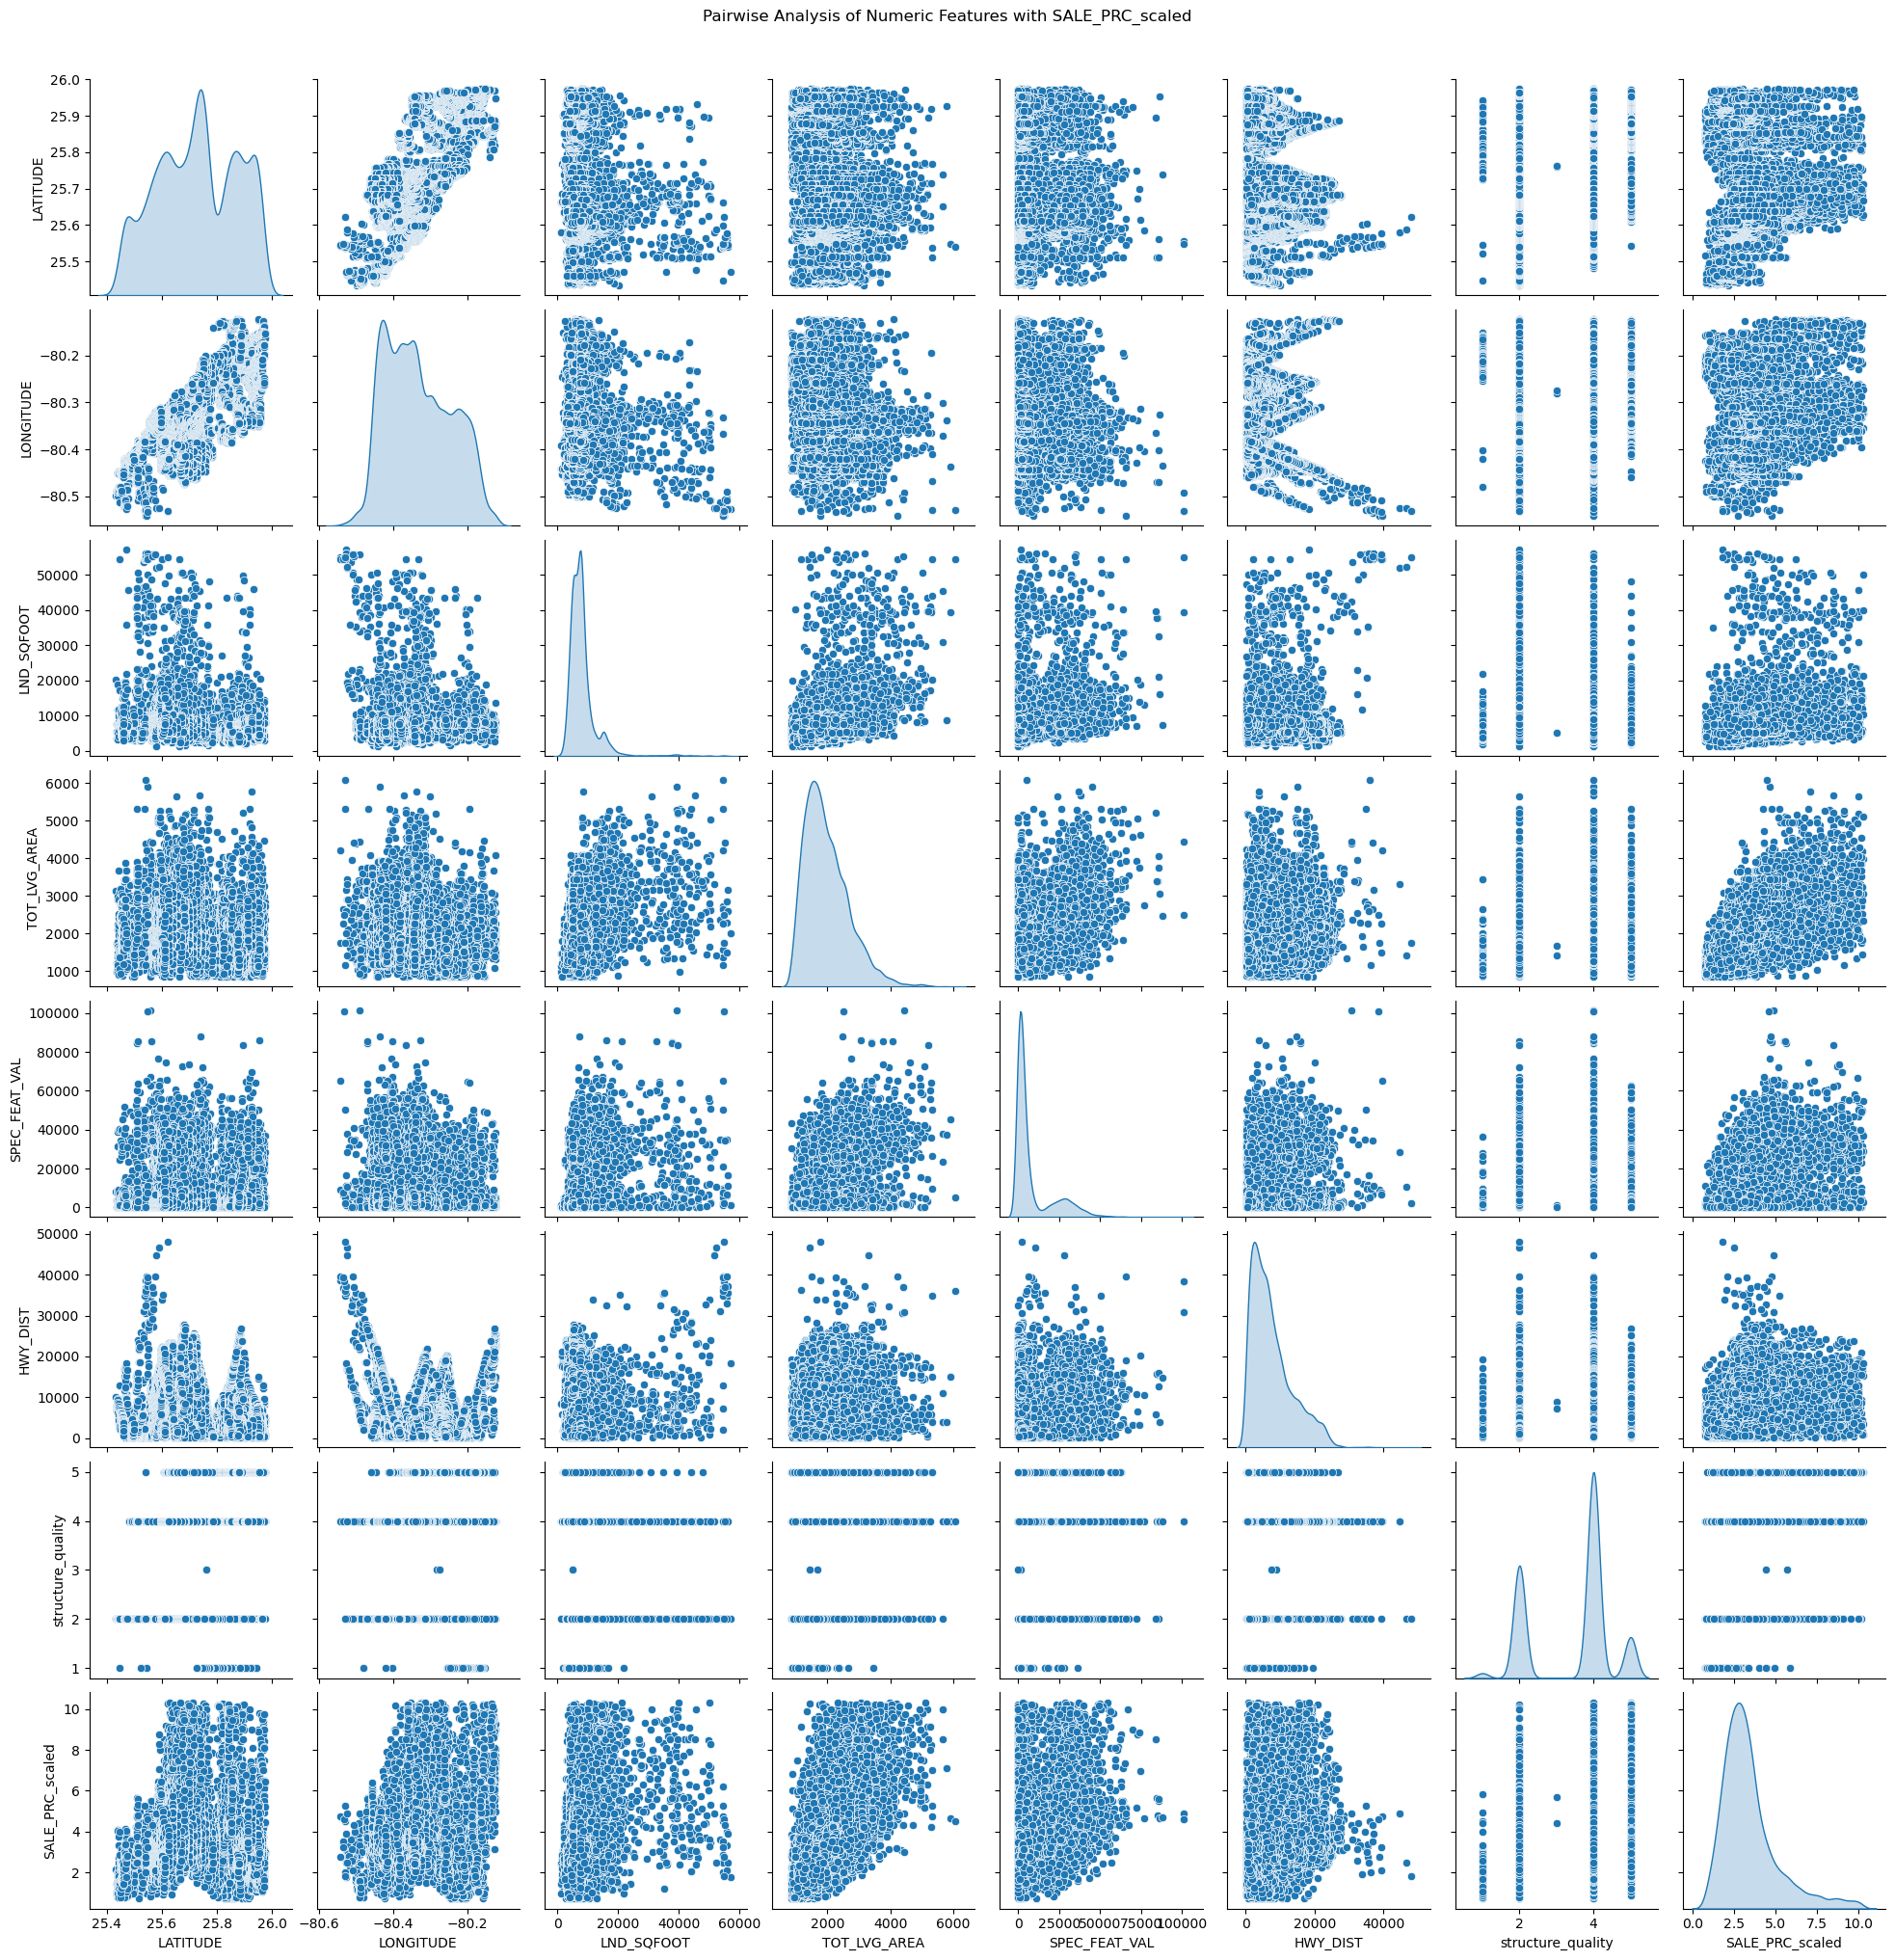

In [17]:
columns_of_interest = ['LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'HWY_DIST', 'structure_quality', 'SALE_PRC_scaled']

# constructing a pairplot without hue
sns.pairplot(miami_housing_df[columns_of_interest], diag_kind='kde')
plt.suptitle('Pairwise Analysis of Numeric Features with SALE_PRC_scaled', y=1.02)
plt.show()


The image depicts a correlation matrix, which is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The values range from -1 to 1. A value of 1 implies that a linear equation describes the relationship between two variables perfectly, with all data points lying on a line for which Y increases as X increases. A value of -1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies no correlation between the variables.

Here are some interpretations from the matrix:

- The color scale goes from dark red (strong positive correlation) to dark blue (strong negative correlation), with white representing no correlation.
- Latitude and longitude have a strong negative correlation with `CNTR_DIST` (distance from the center), which is expected as the closer to the center, the smaller the latitude and longitude values.
- `SPEC_FEAT_VAL` (special feature value) has a moderate positive correlation with `TOT_LVG_AREA` (total living area), suggesting that larger living areas may have more special features.
- `age` has a strong negative correlation with `month_sold`, which could suggest some seasonal pattern where older structures are sold during certain months, or it may be a spurious correlation.
- `structure_quality` has a moderate positive correlation with `SALE_PRC_scaled` (scaled sale price), indicating that higher quality structures tend to sell for higher prices.

Correlation matrices are useful in identifying relationships between variables, which can be helpful for feature selection in modeling or for identifying patterns in data.

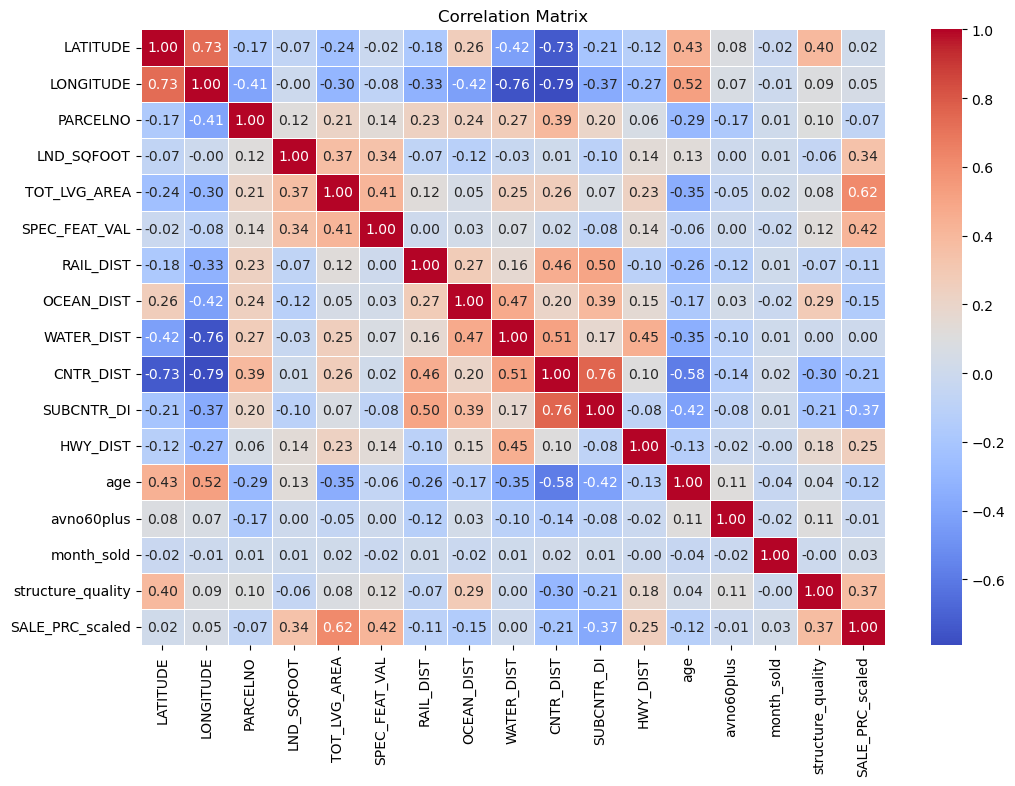

In [18]:
# Create a correlation matrix
correlation_matrix = miami_housing_df.corr()

# Plotting the correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Feature Selection

The image contains a snippet of Python code that relates to feature selection for a dataset presumably about housing in Miami. Here's a breakdown of the cod

- A list named `features_selected` contains strings that are names of columns. These features are chosen based on their relevance to the target variable or the strength of their correlation with the target variable.
- `X` is assigned a subset of `miami_housing_df` that includes only the columns listed in `features_selected`. This will be used as the input features for a predictive model.
- `y` is assigned the values from the column `SALE_PRC_scaled` in `miami_housing_df`, which represents the target variable, likely the scaled sale price of properties.

The purpose of this code is to prepare the input features (`X`) and the target variable (`y`) for machine learning modeling, where the goal is to predict the sale price of properties based on the selected features.

In [19]:
features_selected = ['LATITUDE','LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 
                     'HWY_DIST','structure_quality', 'RAIL_DIST']

X = miami_housing_df[features_selected]
y = miami_housing_df['SALE_PRC_scaled']

## PART 2: Model Development & Evaluation
## Splitting the data into training and testing sets

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Printing the dimensions
print(f"Training set dimensions are as follows: {X_train.shape}")
print(f"Testing set dimensions are as follows: {X_test.shape}")



Training set dimensions are as follows: (10601, 8)
Testing set dimensions are as follows: (2651, 8)


## Utilizing StandardScaler 

In [21]:
scaler = StandardScaler()
scaler.fit(X_train[['RAIL_DIST', 'LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'HWY_DIST', 'structure_quality']])

X_train[['RAIL_DIST', 'LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'HWY_DIST', 'structure_quality']] = scaler.transform(X_train[['RAIL_DIST', 'LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'HWY_DIST', 'structure_quality']])

X_test[['RAIL_DIST', 'LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'HWY_DIST', 'structure_quality']] = scaler.transform(X_test[['RAIL_DIST', 'LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'HWY_DIST', 'structure_quality']]).round(2)


# Displaying the normalized data
print("Normalized Training Data:")
print(X_train.head())

Normalized Training Data:
       LATITUDE  LONGITUDE  LND_SQFOOT  TOT_LVG_AREA  SPEC_FEAT_VAL  HWY_DIST  \
7058   1.207341   0.204396   -0.070918      0.681120      -0.541335 -0.716985   
12445 -0.262989  -0.813531    0.151768      0.287488      -0.358610 -0.500083   
2907   0.459106   0.934054   -0.268674     -0.498361       0.171309 -0.824853   
9232  -0.998145   0.117512    0.011371      4.393722      -0.673197  1.148096   
10208 -1.808248  -1.068219    0.687301      2.082903      -0.471497 -0.478873   

       structure_quality  RAIL_DIST  
7058            1.424317   1.127958  
12445           0.499519   0.840247  
2907           -1.350079  -1.005943  
9232           -1.350079   1.409821  
10208          -1.350079   1.474136  


## Support Vector Machine Regressor

In [22]:
svm_regressor = SVR()

# Train the model on the scaled data
svm_regressor.fit(X_train, y_train)

SVR()

In [23]:
y_pred = svm_regressor.predict(X_test)

print('The predicted Outcome is: {}'.format(y_pred))

The predicted Outcome is: [2.07525072 2.30139514 2.23560761 ... 1.95513052 1.8349861  5.46395193]


In [24]:
# Calculate Mean Squared Error 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared 
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.4530297982694402
R-squared (R2): 0.842963456715239


In [25]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 2],
    'epsilon': [0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# Create an SVR instance
svm_regressor = SVR()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the model using the best hyperparameters
best_svm_regressor = SVR(**best_params)
best_svm_regressor.fit(X_train, y_train)

# Make predictions(on the test set)
y_pred_best = best_svm_regressor.predict(X_test)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Displaying the results
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"R-squared (R2): {r2_best}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/sumershinde/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


##  Decision Tree Regression 

In [26]:
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict the labels (test set)
y_pred = dt_regressor.predict(X_test)

# Print the predicted sale prices
print('The predicted sale prices are: {}'.format(y_pred))

The predicted sale prices are: [1.5  2.45 2.5  ... 1.92 1.75 5.75]


In [27]:
# Calculate Mean Squared Error 
mse_dt = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for Decision Tree: {mse_dt}")

# Calculate R-squared 
r2_dt = r2_score(y_test, y_pred)
print(f"R-squared (R2) for Decision Tree: {r2_dt}")


Mean Squared Error (MSE) for Decision Tree: 0.7080283948264429
R-squared (R2) for Decision Tree: 0.7545717034602781


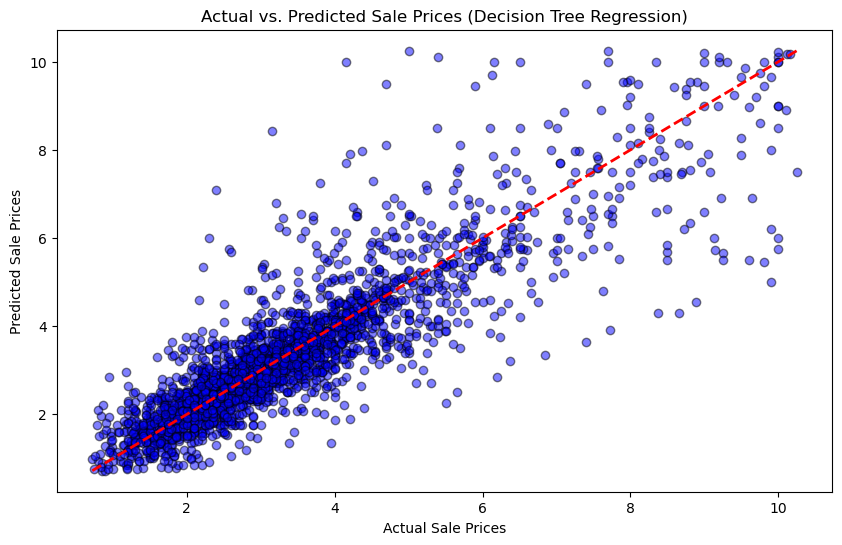

In [28]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')

# Add labels and title
plt.title('Actual vs. Predicted Sale Prices (Decision Tree Regression)')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')

# Add a diagonal line 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Showcase the plot
plt.show()


In [29]:
# Define the parameter grid
param_grid = {
    'max_depth': [15, 20],  # Adjust the values based on your preference
    'min_samples_split': [15, 20],
    'min_samples_leaf': [6, 8]
}

# Use GridSearchCV to find the hyperparameters
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search.best_params_

# Train the Decision Tree model using the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params_dt, random_state=42)
best_dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_best = best_dt_regressor.predict(X_test)

# Evaluate the performance
mse_dt_best = mean_squared_error(y_test, y_pred_dt_best)
r2_dt_best = r2_score(y_test, y_pred_dt_best)

# Displaying the results
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")
print(f"Mean Squared Error (MSE) for Decision Tree (Best): {mse_dt_best}")
print(f"R-squared (R2) for Decision Tree (Best): {r2_dt_best}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=15; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=15; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=15; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=15; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=15; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15; total time=   0.1s
[CV] END max_dep

##  KNN

In [30]:
# Creating a KNN regressor with a default value of k=7
knn_regressor = KNeighborsRegressor(n_neighbors=7)

# Training the model on the training data
knn_regressor.fit(X_train, y_train)

# Predicting the labels (test set)
y_pred_knn = knn_regressor.predict(X_test)

# Print the predicted sale prices using KNN
print('The predicted sale prices using KNN are: {}'.format(y_pred_knn))


The predicted sale prices using KNN are: [1.71285714 2.01571429 2.3        ... 1.85428571 2.005      6.18914286]


In [31]:
# Calculating Mean Squared Error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE) for KNN: {mse_knn}")

# Calculating R-squared
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-squared (R2) for KNN: {r2_knn}")


Mean Squared Error (MSE) for KNN: 0.49170300397456107
R-squared (R2) for KNN: 0.8295579223224203


In [32]:
# Create a KNN Regressor
knn_regressor = KNeighborsRegressor()

# Define the parameter grid with a range of values for n_neighbors
param_grid = {
    'n_neighbors': range(1, 20)  # Adjust the range and step based on your preference
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search.best_params_

# Train the KNN model using the best hyperparameters
best_knn_regressor = KNeighborsRegressor(**best_params_knn)
best_knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn_best = best_knn_regressor.predict(X_test)

# Evaluate the performance
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
r2_knn_best = r2_score(y_test, y_pred_knn_best)

# Displaying the results
print(f"Best Hyperparameters for KNN: {best_params_knn}")
print(f"Mean Squared Error (MSE) for KNN (Best): {mse_knn_best}")
print(f"R-squared (R2) for KNN (Best): {r2_knn_best}")


Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n

In [33]:
# Define the extended parameter grid
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree'],  # algorithm used to compute the nearest neighbors
}

# Create the KNN regressor
knn_regressor = KNeighborsRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the best model on the entire training set
best_knn_regressor = KNeighborsRegressor(**best_params)
best_knn_regressor.fit(X_train, y_train)

# Now you can use best_knn_regressor for predictions
y_pred_best = best_knn_regressor.predict(X_test)

# Display the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

mse_best_knn = mean_squared_error(y_test, y_pred_best)
r2_best_knn = r2_score(y_test, y_pred_best)

# Displaying the results
print(f"Mean Squared Error (MSE) for KNN: {mse_best_knn}")
print(f"R-squared (R2) for KNN: {r2_best_knn}")


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
Mean Squared Error (MSE) for KNN: 0.47208199070388424
R-squared (R2) for KNN: 0.8363592764751531


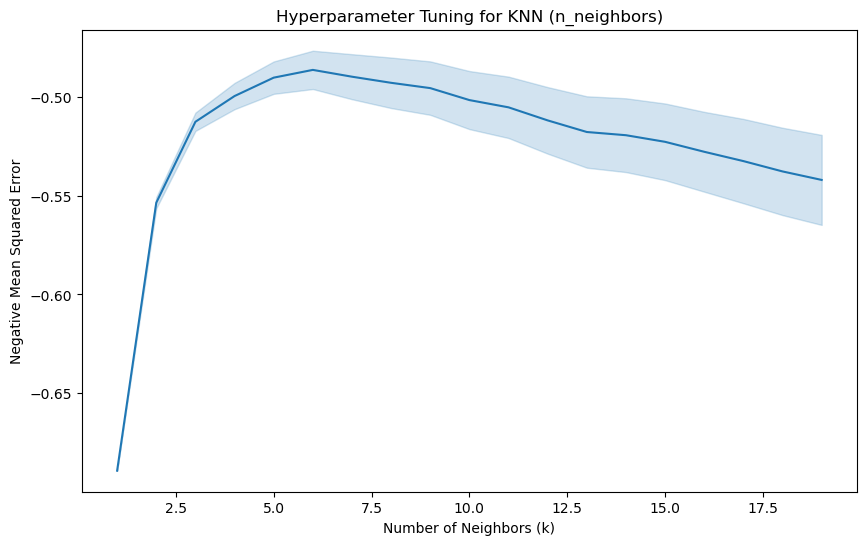

In [34]:
# Extract the results from the grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot the mean squared error against different values of 'n_neighbors'
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=results_df)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter Tuning for KNN (n_neighbors)')
plt.show()


## Random Forest Regressor 

In [35]:
# Create the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the model on the normalized training data
random_forest_regressor.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = random_forest_regressor.predict(X_test)

# Print the predicted sale prices
print('The predicted sale prices are: {}'.format(y_pred))

The predicted sale prices are: [1.71454    1.89495    2.2766     ... 2.02077    1.92617667 4.72945   ]


In [36]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")=

SyntaxError: cannot assign to function call (86914627.py, line 6)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the entire training set using the best hyperparameters
best_random_forest_regressor = RandomForestRegressor(**best_params, random_state=42)
best_random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_random_forest_regressor.predict(X_test)

# Evaluate the performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Display the results
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"R-squared (R2): {r2_best}")


## Best Model Selection

In [ ]:
# 1. Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

grid_search_rf = GridSearchCV(random_forest_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_rf.fit(X_train, y_train)

best_random_forest_regressor = grid_search_rf.best_estimator_
y_pred_rf = best_random_forest_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 2. KNN
knn_regressor = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': range(1, 20),
}

grid_search_knn = GridSearchCV(knn_regressor, param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_knn.fit(X_train, y_train)

best_knn_regressor = grid_search_knn.best_estimator_
y_pred_knn = best_knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# 3. Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42)

param_grid_dt = {
    'max_depth': [15, 20],
    'min_samples_split': [15, 20],
    'min_samples_leaf': [6, 8]
}

grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_dt.fit(X_train, y_train)

best_dt_regressor = grid_search_dt.best_estimator_
y_pred_dt = best_dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# 4. Support Vector Machine Regressor
svm_regressor = SVR()

param_grid_svm = {
    'C': [0.1, 1, 2],
    'epsilon': [0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(svm_regressor, param_grid_svm, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svm.fit(X_train, y_train)

best_svm_regressor = grid_search_svm.best_estimator_
y_pred_svm = best_svm_regressor.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Compare the models based on MSE and R2
model_results = {
    'Random Forest': (mse_rf, r2_rf),
    'KNN': (mse_knn, r2_knn),
    'Decision Tree': (mse_dt, r2_dt),
    'SVM': (mse_svm, r2_svm)
}

best_model_name = min(model_results, key=lambda k: model_results[k][0]) 

print(f"Best Model: {best_model_name}")
print(f"Mean Squared Error (MSE): {model_results[best_model_name][0]}")
print(f"R-squared (R2): {model_results[best_model_name][1]}")


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
